<a href="https://colab.research.google.com/github/cerniello/Human-Instance-Segmentation/blob/master/AML_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Human-Instance-Segmentation (given trajectories) from surveillance cameras
## DEMO - runned on Colaboratory
### Fabio Montello, Francesco Russo, Michele Cernigliaro

Installation of the libraries needed in order to execute the code. 
Due to some deprecated function still used in the OSVOS Pytorch original implementation, we forced the downgrade of SciPy to the version 1.2.1.

*Notice: in different environments than Google Colab, it may be required to install and configure other libraries that are already pre-installed here. In particular, the library CMake needs to be present in order to install pybgs. *


In [0]:
import os  # to see the results
import cv2 # to see the results
import numpy as np # to see the results
import matplotlib.pyplot as plt
import matplotlib.animation as animation

from IPython import display
from IPython.display import HTML

In [2]:
!pip install tensorboardx==2.0
!pip install scipy==1.2.1
!pip install pybgs

     |████████████████████████████████| 204kB 4.8MB/s 
     |████████████████████████████████| 24.8MB 131kB/s 
ERROR: umap-learn 0.4.3 has requirement scipy>=1.3.1, but you'll have scipy 1.2.1 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement scipy==1.4.1; python_version >= "3", but you'll have scipy 1.2.1 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
     |████████████████████████████████| 860kB 4.7MB/s 
  Created wheel for pybgs: filename=pybgs-3.0.0.post2-cp36-cp36m-linux_x86_64.whl size=576519 sha256=3788630c3f1d9d1f32ca2bab034eed2329fcc429a6bee5c939d694cb4ddda6a3
  Stored in directory: /root/.cache/pip/wheels/39/84/6b/21154fbbc184392b758861940092274514716d708f887aec42
Successfully built pybgs


We can then proceed to clone the project repository and move our working path inside it.

In [3]:
!git clone https://github.com/cerniello/Human-Instance-Segmentation.git
%cd Human-Instance-Segmentation/ 

Cloning into 'Human-Instance-Segmentation'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (160/160), done.
remote: Total 202 (delta 90), reused 68 (delta 21), pack-reused 0
Receiving objects: 100% (202/202), 20.76 MiB | 34.80 MiB/s, done.
Resolving deltas: 100% (90/90), done.
/content/Human-Instance-Segmentation


Downloading the video sequence in avi format.

In [4]:
!gdown --id 1_c8TsGlAJBijQJH_Xl4SOnJH9y_-pk76
!mkdir data/crowds_zara02_frames/

Downloading...
From: https://drive.google.com/uc?id=1_c8TsGlAJBijQJH_Xl4SOnJH9y_-pk76
To: /content/Human-Instance-Segmentation/crowds_zara02.avi
63.5MB [00:01, 62.5MB/s]


Extracting the frames from the video sequence 'crowds_zara02.avi'.

In [0]:
vidcap = cv2.VideoCapture('crowds_zara02.avi')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("data/crowds_zara02_frames/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1

Running the algorithms in order to create the masking annotations. These are the arguments we can pass in order to tune the algorithm:

In [6]:
!python run_masking_preprocessing.py --help

usage: run_masking_preprocessing.py [-h] [--pID PID]
                                    [--use_mask_rcnn USE_MASK_RCNN]
                                    [--output_folder OUTPUT_FOLDER]
                                    [--frames_folder FRAMES_FOLDER]
                                    [--text_folder TEXT_FOLDER]
                                    [--start_frame START_FRAME]
                                    [--debug DEBUG] [--distance DISTANCE]
                                    [--bb_thr BB_THR]
                                    [--more_frames MORE_FRAMES]
                                    [--homography HOMOGRAPHY]

Masking creating for OSVOS

optional arguments:
  -h, --help            show this help message and exit
  --pID PID             Person id to be selected from the dataframe
  --use_mask_rcnn USE_MASK_RCNN
                        Define the type of masking, available: mask RCNN or
                        BGS
  --output_folder OUTPUT_FOLDER
                    

In [0]:
# Note: use more_frames (>0) if you wanto to get more ground truth
# ---> effect: much more data to train ==> much more training time

# Select the person with pID

In [56]:
# variable for the plots
pID=14
# variable for run_masking_preprocessing
%env PID=14
# variable for OSVOS
%env SEQ_NAME=pID14

env: PID=14
env: SEQ_NAME=pID14


In [57]:
%cd /content/Human-Instance-Segmentation/
!python run_masking_preprocessing.py --pID=$PID --use_mask_rcnn=True --debug=True --more_frames=0 \
                                     --distance=25 \
                                     --bb_thr=0.4 \
                                     --homography=/content/Human-Instance-Segmentation/data/homography_matrix/ucy_zara02.txt

/content/Human-Instance-Segmentation
 - Download model
 - Create subfolders
 - Selecting the pictures with pID: 14
 - Homography matrix loaded
 - First step: finding bounding boxes using mask RCNN
 - Annotation found in frame  540
 - Annotation found in frame  550
 - Annotation found in frame  560
 - Annotation found in frame  570
 - Annotation found in frame  580
 - Annotation found in frame  590
 - Annotation found in frame  600
 - Annotation found in frame  620
 - Annotation found in frame  630
 - Annotation found in frame  640
 - Annotation found in frame  650
 - Annotation found in frame  660
 - Annotation found in frame  680
 - Annotation found in frame  690
 - Annotation found in frame  710
 - Annotation found in frame  720
 - Annotation found in frame  730
 - Annotation found in frame  740
 - Annotation found in frame  750
 - Annotation found in frame  760
 - Annotation found in frame  770
 - Annotation found in frame  780
 - Annotation found in frame  790
 - Annotation found i

In [0]:
# Download the OSVOS parent model using the .sh code provided in OSVOS-Pytorch github
# (it donwload it using wget and then unzip it, removing the zip)

In [59]:
!cd /content/Human-Instance-Segmentation/models/; chmod +x download_parent_model.sh
!cd /content/Human-Instance-Segmentation/models/; ./download_parent_model.sh

--2020-06-04 14:59:09--  https://data.vision.ee.ethz.ch/kmaninis/share/OSVOS/Downloads/models/pth_parent_model.zip
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.162
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.162|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55456213 (53M) [application/zip]
Saving to: ‘pth_parent_model.zip’

pth_parent_model.zi 100%[===================>]  52.89M  4.12MB/s    in 13s     

2020-06-04 14:59:23 (3.99 MB/s) - ‘pth_parent_model.zip’ saved [55456213/55456213]

Archive:  pth_parent_model.zip
replace parent_epoch-239.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Check some generated ground truth

In [0]:
nr_images = 4
boundingbox_path = sorted(os.listdir('/content/Human-Instance-Segmentation/data/BoundingBox/pID' + str(pID)))[0:nr_images]
annotations_path = sorted(os.listdir('/content/Human-Instance-Segmentation/data/Annotations/pID' + str(pID)))[0:nr_images]

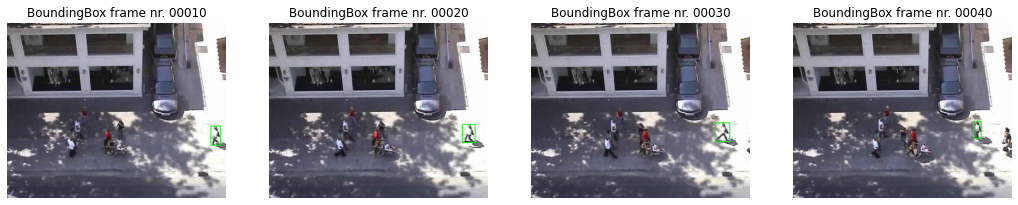

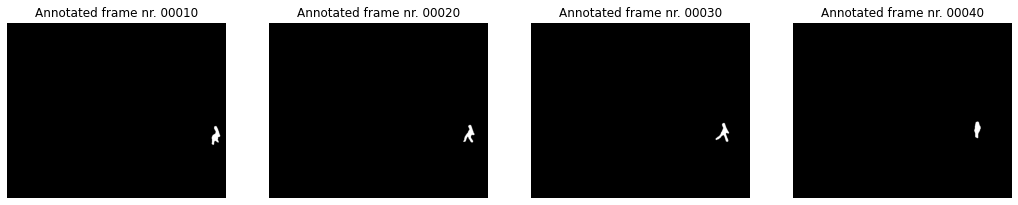

In [61]:
fig, ax_ = plt.subplots(1, nr_images, figsize=(18, 18))

for i,ax in enumerate(ax_):
  img = plt.imread('/content/Human-Instance-Segmentation/data/BoundingBox/pID' + str(pID) + '/' + boundingbox_path[i])
  ax.axis('off')
  ax.set_title('BoundingBox frame nr. ' + boundingbox_path[i].split('.')[0])
  ax.imshow(img)

plt.show()

fig, ax_ = plt.subplots(1, nr_images, figsize=(18, 18))
for i,ax in enumerate(ax_):
  img = plt.imread('/content/Human-Instance-Segmentation/data/Annotations/pID' + str(pID) + '/' + annotations_path[i])
  ax.axis('off')
  ax.set_title('Annotated frame nr. ' + annotations_path[i].split('.')[0])
  ax.imshow(img)

plt.show()

Running OSVOS algorithm

In [62]:
!python run_OSVOS_pretrained.py --help

usage: run_OSVOS_pretrained.py [-h] [--seq_name SEQ_NAME]
                               [--data_folder DATA_FOLDER]
                               [--output_folder OUTPUT_FOLDER]
                               [--epochs EPOCHS] [--batch_size BATCH_SIZE]
                               [--models_dir MODELS_DIR]
                               [--threshold THRESHOLD]

OSVOS running demo

optional arguments:
  -h, --help            show this help message and exit
  --seq_name SEQ_NAME   person sequence to be trained and tested on OSVOS
  --data_folder DATA_FOLDER
                        where is located the data folder
  --output_folder OUTPUT_FOLDER
                        where the results will be located
  --epochs EPOCHS       Number of epochs for the online training (note that
                        the final nEpochs is epochs*nAvegrad)
  --batch_size BATCH_SIZE
                        Batch size
  --models_dir MODELS_DIR
                        where the parent model is located
  --

In [63]:
# check how many images to train.. this just to 
# understand how big the batch_size should be
# note: batch size > 10 could run out your GPU memory

len(os.listdir("/content/Human-Instance-Segmentation/data/Annotations/pID" + str(pID)))

25

In [64]:
!python run_OSVOS_pretrained.py --seq_name=$SEQ_NAME --epochs=50 --output_folder="results" #--batch_size=

 - Online training snapshots every: [12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240]
Constructing OSVOS architecture..
Done initializing train_seqs Dataset
Done initializing val_seqs Dataset
 - n. batches per training epoch: 25, batchsize: 1
 - n. test images: 290
 - Start of Online Training, sequence: pID14
 - [Epoch: 12, numImages:     1]
 - Loss: 5.279153
 - [Epoch: 12, numImages:     2]
 - Loss: 6.103028
 - [Epoch: 12, numImages:     3]
 - Loss: 9.866836
 - [Epoch: 12, numImages:     4]
 - Loss: 7.732498
 - [Epoch: 12, numImages:     5]
 - Loss: 6.280125
 - [Epoch: 12, numImages:     6]
 - Loss: 8.015734
 - [Epoch: 12, numImages:     7]
 - Loss: 4.749219
 - [Epoch: 12, numImages:     8]
 - Loss: 7.659437
 - [Epoch: 12, numImages:     9]
 - Loss: 5.965782
 - [Epoch: 12, numImages:    10]
 - Loss: 8.265205
 - [Epoch: 12, numImages:    11]
 - Loss: 6.738530
 - [Epoch: 12, numImages:    12]
 - Loss: 5.967347
 - [Epoch: 12, numImages:    13]
 

## Show the results

In [65]:
frames_path = os.listdir('/content/Human-Instance-Segmentation/results/pID' + str(pID) + '/')
frames_path = sorted(frames_path)

fig = plt.figure(figsize=(12,8), frameon=False)
plt.gca().set_axis_off()
plt.margins(0,0)

frames = []
for frame in frames_path:

    img = cv2.imread('/content/Human-Instance-Segmentation/results/pID' + str(pID) + '/' + frame)
    
    img_shown = plt.imshow(img, animated=True, aspect='auto')
    plt.axis('off')
    frames.append([img_shown])
    
    ani = animation.ArtistAnimation(fig, frames, interval=40, blit=False,
                                repeat_delay=1000)

plt.close()
HTML(ani.to_html5_video())

In [66]:
# load original images of pID
frames_path = os.listdir('/content/Human-Instance-Segmentation/data/JPEGImages/pID' + str(pID))
frames_path = sorted(frames_path)
# load the results of osvos
annotations_path = os.listdir("/content/Human-Instance-Segmentation/results/pID" + str(pID))
annotations_path = sorted(annotations_path)

fig = plt.figure(figsize=(12,8), frameon=False)
plt.gca().set_axis_off()
plt.margins(0,0)

frames = []
for idx in range(len(frames_path)):

    img = cv2.imread("/content/Human-Instance-Segmentation/data/JPEGImages/pID" + str(pID) + "/" + frames_path[idx])
    mask_img = cv2.imread('/content/Human-Instance-Segmentation/results/pID' + str(pID) + "/" + annotations_path[idx])[:,:,0]
    mask_img = mask_img.astype(np.uint8) * 255


    overlay_color = [255, 0, 0]
    transparency = 0.6
    plt.ion()

    final_img = np.ndarray(img.shape)
    final_img[:, :, 0] = (1 - mask_img) * img[:, :, 0] + mask_img * (overlay_color[0]*transparency + (1-transparency)*img[:, :, 0])
    final_img[:, :, 1] = (1 - mask_img) * img[:, :, 1] + mask_img * (overlay_color[1]*transparency + (1-transparency)*img[:, :, 1])
    final_img[:, :, 2] = (1 - mask_img) * img[:, :, 2] + mask_img * (overlay_color[2]*transparency + (1-transparency)*img[:, :, 2])
    
    img_shown = plt.imshow(final_img.astype(np.uint8), animated=True, aspect='auto')
    plt.axis('off')
    frames.append([img_shown])
    
ani = animation.ArtistAnimation(fig, frames, interval=40, blit=False,
                                repeat_delay=1000)

plt.close()
HTML(ani.to_html5_video())